In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [2]:
# Reading the dataset
fraud=pd.read_csv("Fraud_check.csv")

In [3]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
# Viewing the type

fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [6]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [7]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
fraud["TaxInc"] = pd.cut(fraud["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [8]:
print(fraud)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10          False   
1             33700           134075               18           True   
2             36925           160205               30          False   
3             50190           193264               15           True   
4             81002            27533               28          False   
..              ...              ...              ...            ...   
595           76340            39492                7           True   
596           69967            55369                2           True   
597           47334           154058                0          False   
598           98592           180083               17           True   
599           96519           158137               16          False   

     Marital.Status_Married  Marital.Status_Single  Urban_YES TaxInc  
0                     False                   True       True   

## Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [9]:
# After creation of new col. TaxInc also made its dummies var concating right side of df
fraud = pd.get_dummies(fraud,columns = ["TaxInc"],drop_first=True)

In [10]:
#Viewing buttom 10 observations
fraud.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,False,True,False,True,True
591,27394,132859,18,True,False,True,True,False
592,68152,75143,16,True,False,True,False,True
593,84775,131963,10,False,False,False,True,True
594,47364,97526,9,False,True,False,True,True
595,76340,39492,7,True,False,False,True,True
596,69967,55369,2,True,False,False,True,True
597,47334,154058,0,False,False,False,True,True
598,98592,180083,17,True,True,False,False,True
599,96519,158137,16,False,False,False,False,True


C:\Users\R128\AppData\Local\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\R128\AppData\Local\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\R128\AppData\Local\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\R128\AppData\Local\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

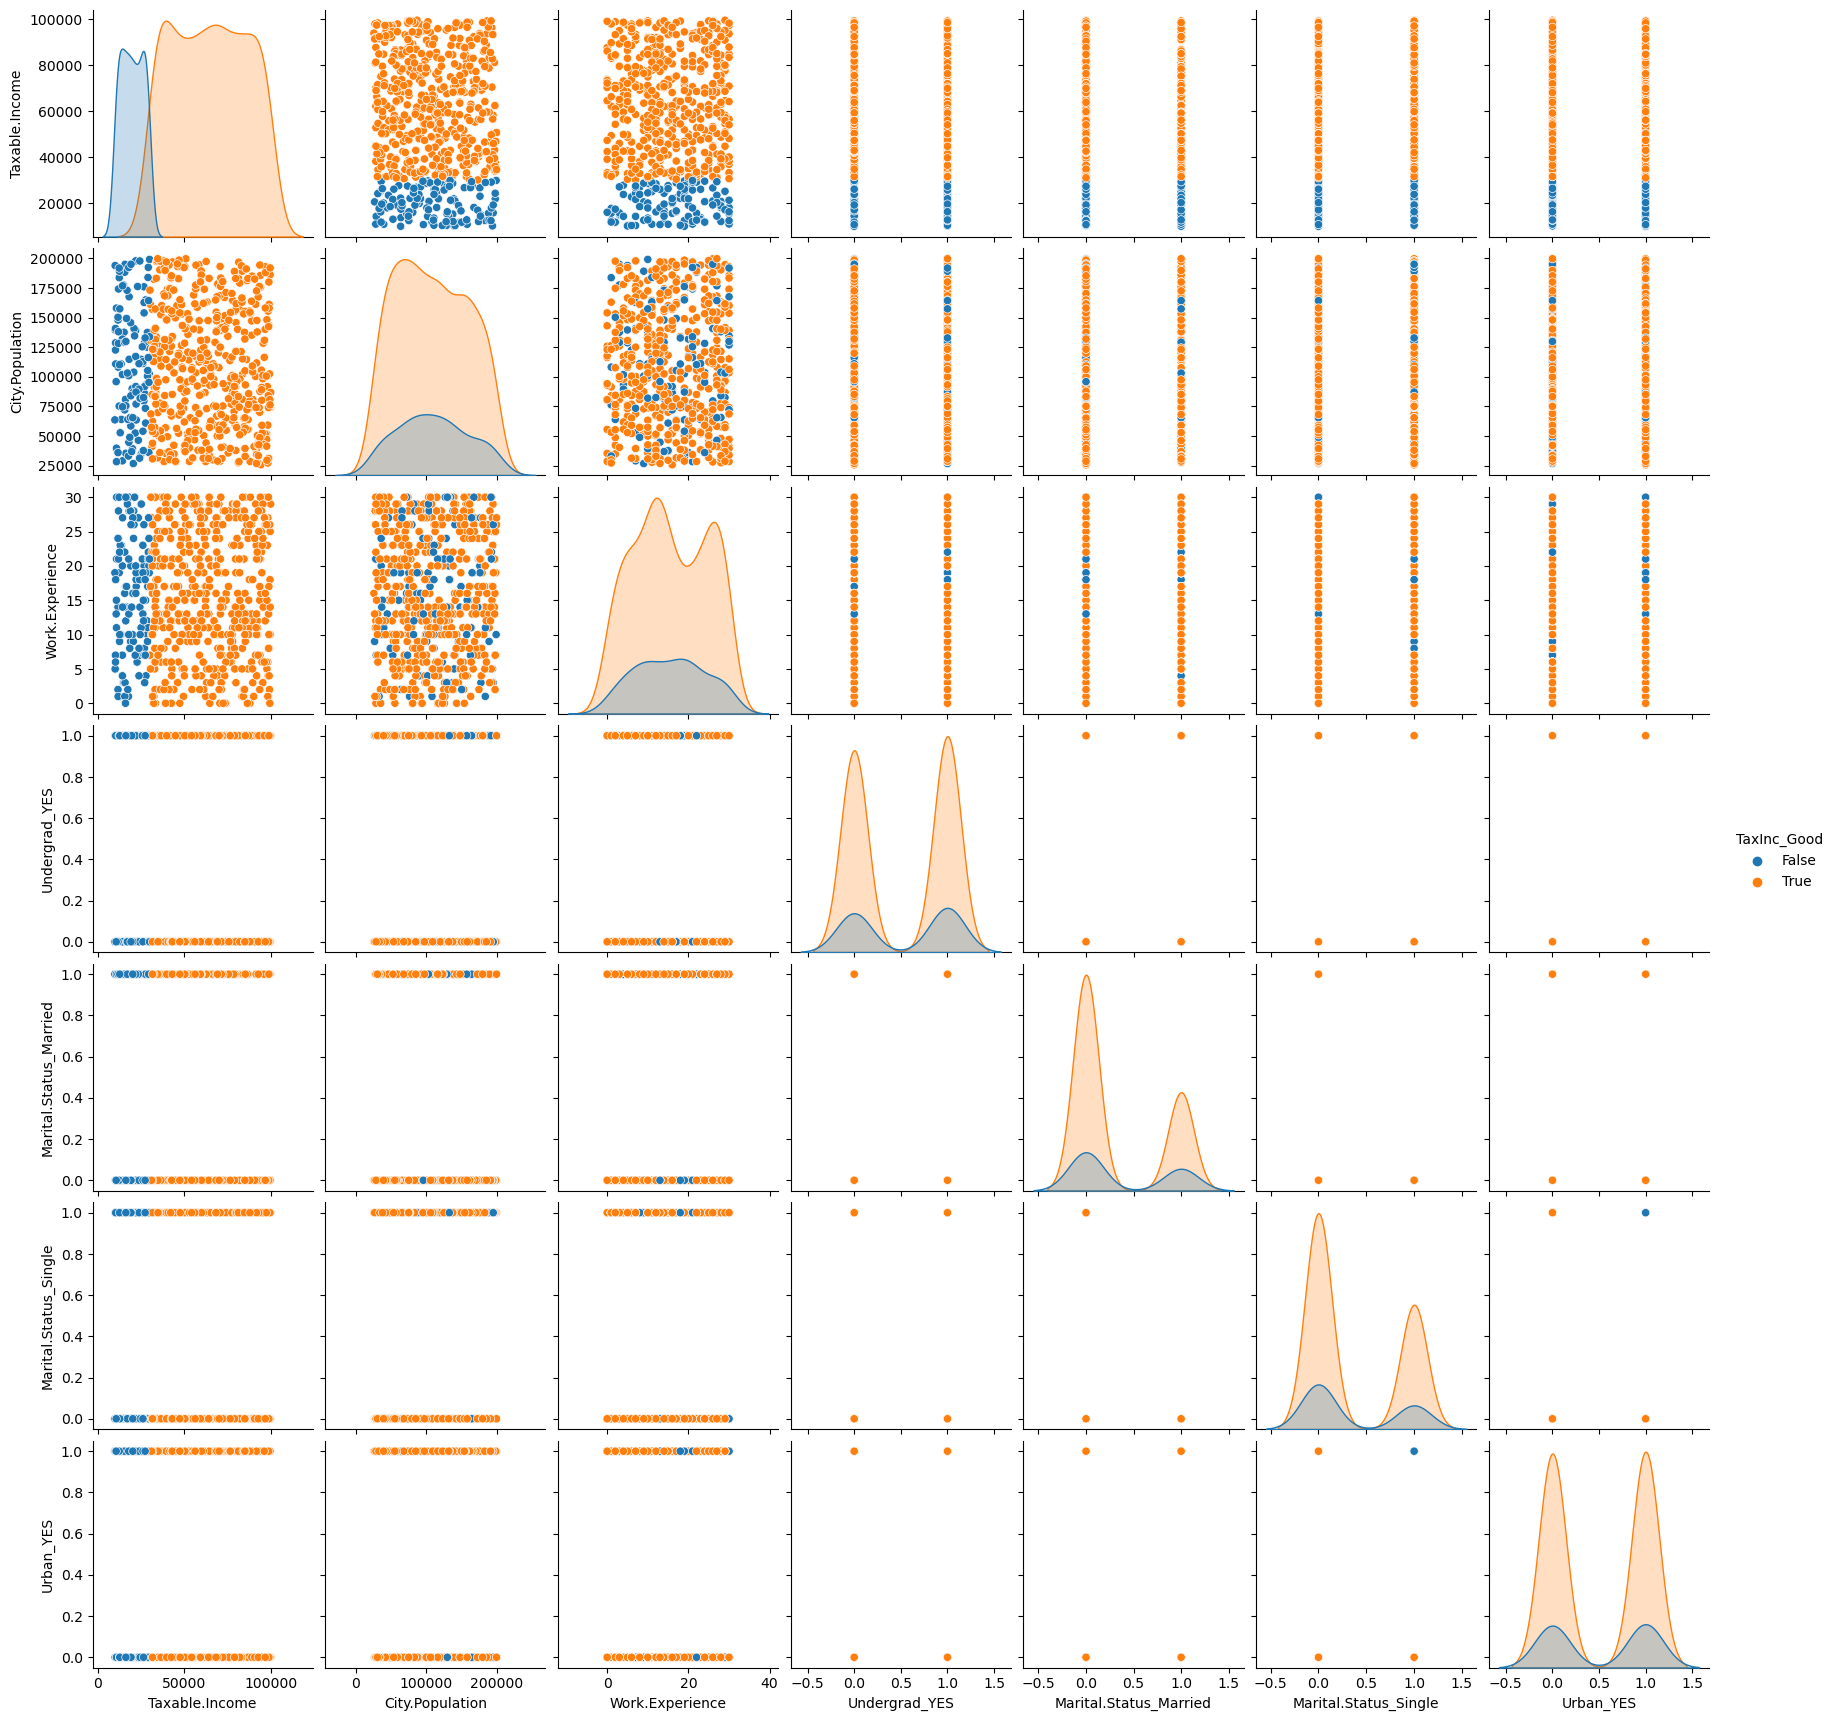

In [11]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=fraud, hue = 'TaxInc_Good')

In [12]:
def norm_func(i):
    if i.dtypes == 'bool':
        # Handle boolean data
        x = np.logical_xor(i, i.min())
    else:
        # Handle other data types
        x = (i - i.min()) / (i.max() - i.min())
    return x

# Assuming 'fraud' is your DataFrame
fraud_norm = fraud.iloc[:, 1:].apply(norm_func, axis=0)

# Display the last 10 rows of the normalized DataFrame
print(fraud_norm.tail(10))

     City.Population  Work.Experience  Undergrad_YES  Marital.Status_Married  \
590         0.341473         0.466667          False                    True   
591         0.615406         0.600000           True                   False   
592         0.283703         0.533333           True                   False   
593         0.610256         0.333333          False                   False   
594         0.412341         0.300000          False                    True   
595         0.078811         0.233333           True                   False   
596         0.170058         0.066667           True                   False   
597         0.737240         0.000000          False                   False   
598         0.886810         0.566667           True                    True   
599         0.760683         0.533333          False                   False   

     Marital.Status_Single  Urban_YES  TaxInc_Good  
590                  False       True         True  
591          

In [13]:
# Declaring features & target
X = fraud_norm.drop(['TaxInc_Good'], axis=1)
y = fraud_norm['TaxInc_Good']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
# Converting the Taxable income variable to bucketing. 
fraud_norm["income"]="<=30000"
fraud_norm.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud_norm.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [17]:
# Droping the Taxable income variable
fraud.drop(["Taxable.Income"],axis=1,inplace=True )

In [18]:
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)
## As we are getting error as "ValueError: could not convert string to float: 'YES'".
## Model.fit doesnt not consider String. So, we encode

In [19]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [21]:
##Splitting the data into featuers and labels
features = fraud.iloc[:,0:5]
labels = fraud.iloc[:,5]

In [22]:
## Collecting the column names
colnames = list(fraud.columns)
predictors = colnames[0:5]
target = colnames[5]
##Splitting the data into train and test

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [33]:
##Model building
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
n_features_used = model.max_features_
print("Number of features used in the decision tree:", n_features_used)

Number of features used in the decision tree: 5


In [36]:
model.n_outputs_

1

In [42]:
model.oob_score_
###74.7833%

AttributeError: 'DecisionTreeClassifier' object has no attribute 'oob_score_'

In [43]:
##Predictions on train data
prediction = model.predict(x_train)

In [44]:
##Accuracy
# For accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
##98.33%

In [45]:
np.mean(prediction == y_train)
##98.33%

1.0

In [46]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [47]:
##Prediction on test data
pred_test = model.predict(x_test)

In [48]:
##Accuracy
acc_test =accuracy_score(y_test,pred_test)
##78.333%

In [49]:
## In random forest we can plot a Decision tree present in Random forest
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO

ModuleNotFoundError: No module named 'pydotplus'

In [50]:
tree = model.estimators_[5]

AttributeError: 'DecisionTreeClassifier' object has no attribute 'estimators_'

In [51]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = targe

SyntaxError: incomplete input (240078704.py, line 2)

In [52]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

NameError: name 'pydotplus' is not defined

### Building Decision Tree Classifier using Entropy Criteria

In [53]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [54]:
from sklearn import tree

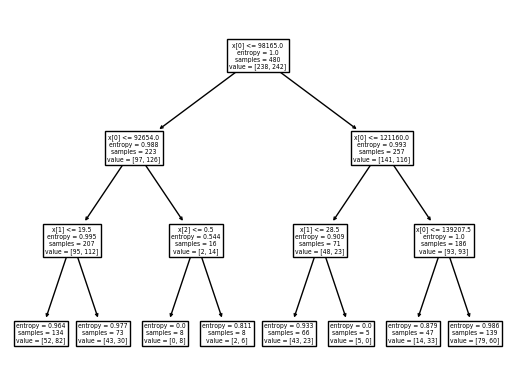

In [55]:
#PLot the decision tree
tree.plot_tree(model);

In [56]:
colnames = list(df.columns)
colnames

NameError: name 'df' is not defined

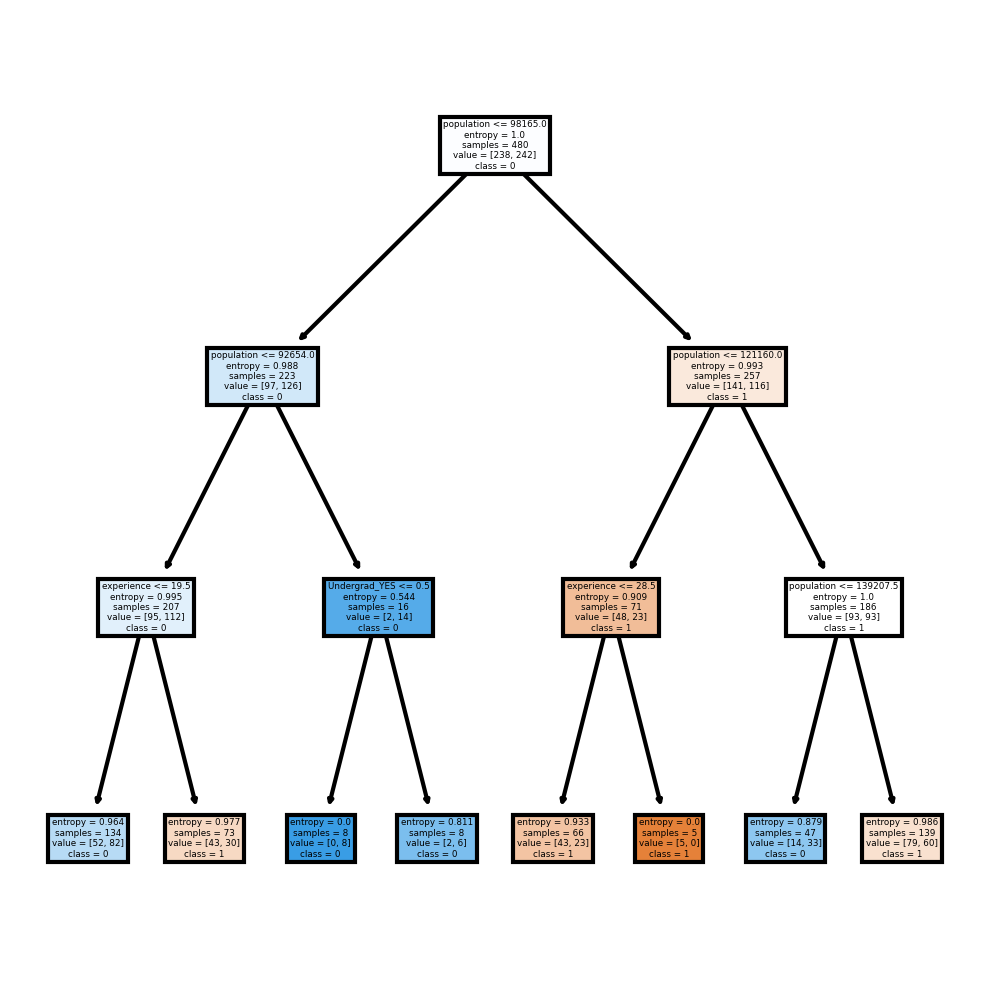

In [57]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [58]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

False    76
True     44
Name: count, dtype: int64

In [59]:
preds

array([False,  True, False,  True, False,  True, False, False, False,
        True, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True, False, False, False,
        True, False,  True, False, False, False,  True, False,  True,
       False, False,  True,  True, False, False, False,  True, False,
       False, False, False,  True,  True,  True, False,  True, False,
        True, False,  True, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False,  True, False, False,  True, False,  True, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False,  True,  True, False, False, False,
        True, False, False, False, False, False,  True, False,  True,
        True, False, False])

In [60]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,False,True
Urban_YES,,
False,38,22
True,38,22


In [67]:
# Accuracy 
np.mean(preds==y_test)

NameError: name 'preds' is not defined

### Building Decision Tree Classifier (CART) using Gini Criteria

In [68]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [69]:
model_gini.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [70]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

NameError: name 'x_test' is not defined

### Decision Tree Regression Example

In [71]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [72]:
array = df.values
X = array[:,0:3]
y = array[:,3]

NameError: name 'df' is not defined

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

NameError: name 'X' is not defined

In [74]:
    model = DecisionTreeRegressor()
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [75]:
#Find the accuracy
model.score(X_test,y_test)

NameError: name 'X_test' is not defined